# Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import PassiveAggressiveRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler

2024-05-24 08:34:34.340713: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-24 08:34:34.340812: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-24 08:34:34.474879: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Import Dataset From kaggle

In [2]:
df = pd.read_csv("/kaggle/input/fuelconsumptionco2-data/FuelConsumptionCo2.csv")

# Display Top 5 records

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Find Unique Values in Specific Column

In [4]:
df['VEHICLECLASS'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'MINICOMPACT', 'SUBCOMPACT',
       'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [5]:
df['FUELCONSUMPTION_COMB'].unique()

array([ 8.5,  9.6,  5.9, 11.1, 10.6, 10. , 10.1, 11.6,  9.2,  9.8, 10.4,
       15.6, 14.7, 15.4,  8.8,  9.3, 10.2, 10.9,  8.3, 11.2, 11.3,  8.4,
       12.5, 15.7, 10.5,  9.1, 13.2, 14.6, 17.7, 17.8, 13.3, 13.4, 12.6,
       11.4, 12.4, 12.2, 12.9, 12.7, 10.3, 15.5, 13.9, 16.5, 14. , 19. ,
        8.7,  6.7,  9.9,  7.9, 10.7, 13.8, 11. , 16.1, 11.9, 14.1, 12.1,
       12.3, 11.5,  8.2,  9.5,  9. , 10.8, 12.8, 16.6, 14.8, 20.1, 16.4,
       22.1, 11.8, 11.7, 12. ,  7.8,  7.1,  7.7, 16.2, 17. , 15.1, 15.9,
       20.9, 21.5, 22.6, 18. , 18.8, 25.7, 18.2, 18.9, 25.8, 14.3,  8. ,
       16.8, 16.9, 13. , 17.3,  7.5,  6.9, 18.4,  8.1, 14.4, 13.1,  8.6,
        7.3,  7.2,  6.8,  6. , 21.9, 17.2, 22.5, 23. , 21.2, 18.3, 23.9,
        9.4, 16. , 21.6, 16.7, 17.5, 19.7, 14.9, 20. , 19.9,  7.6,  6.6,
        7. ,  8.9,  5.5,  4.8,  6.3,  6.2, 14.5, 15. , 18.1, 13.7, 13.5,
       15.8,  9.7, 17.4, 21.4, 20.7,  5.6, 15.3,  7.4, 15.2, 14.2,  6.4,
       13.6, 17.1,  5.7,  4.7,  5.4])

In [6]:
df['MODELYEAR'].unique()

array([2014])

**This shows that the data contains information of CO2 emissions of the cars in 2014.**

**This also shows that the dataset contain only integer and float datatypes**

# Display Description Of The Data

In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


# Check NULL  Values Of The Whole Dataset

In [8]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

# Make Another Dataset For The Participating Columns

In [9]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

**Show top 5 Records**

In [10]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


# Visualize The Data

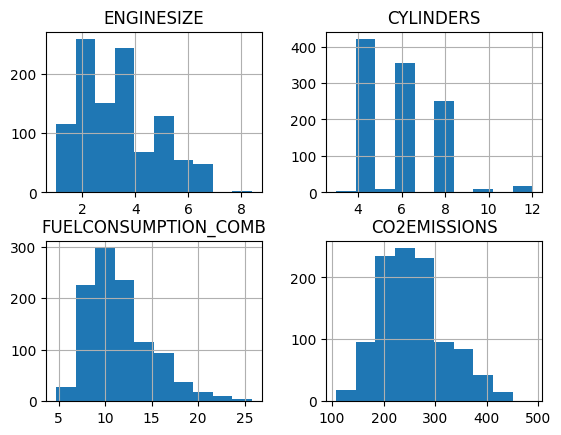

In [11]:
cdf.hist()
plt.show()

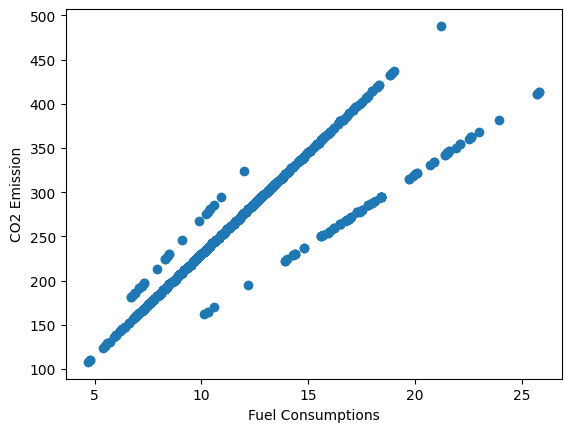

In [12]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS)
plt.xlabel("Fuel Consumptions")
plt.ylabel("CO2 Emission")
plt.show()

# Result from above graph :

**The graph shows that the CO2 Emission is directly proportional to the Fuel Consumptions.**

Text(0, 0.5, 'CO2 Emission')

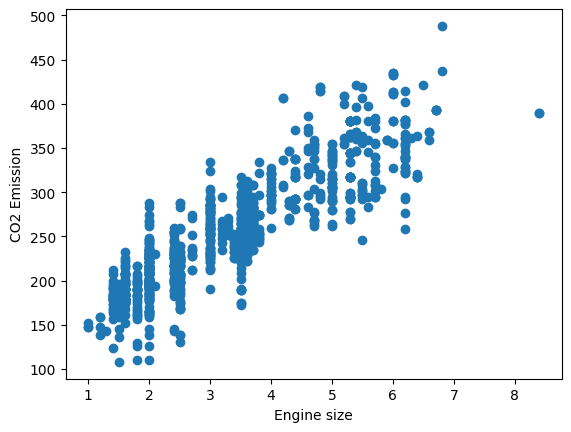

In [13]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")

# Result from above graph :

**The graph shows that the CO2 Emission is directly proportional to the Engine size.**

Text(0, 0.5, 'Number of cylinders')

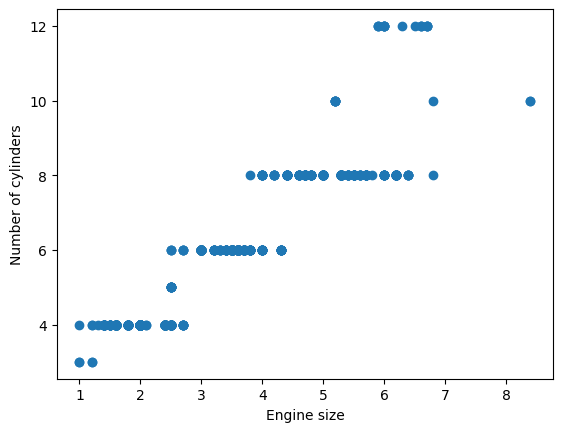

In [14]:
plt.scatter(cdf.ENGINESIZE,cdf.CYLINDERS)
plt.xlabel("Engine size")
plt.ylabel("Number of cylinders")

# Result from above graph :

**The graph shows that the Number of cylinders is directly proportional to the Engine size.**

# SPLIT THE DATA INTO TRAINING AND TEST SET

In [15]:
train, test = train_test_split(cdf, test_size=0.2, random_state=42)

# Training Data Distribution

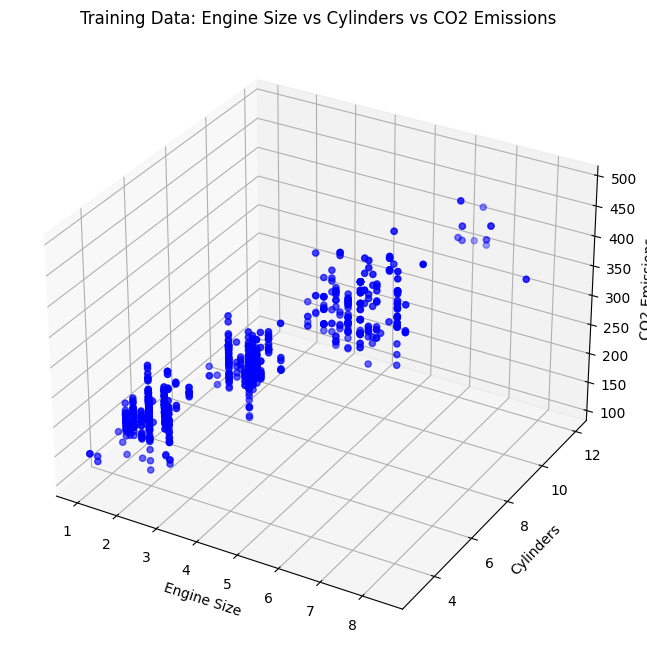

In [16]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the training data
ax.scatter(train['ENGINESIZE'], train['CYLINDERS'], train['CO2EMISSIONS'], c='blue', marker='o')

# Labeling the axes
ax.set_xlabel('Engine Size')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 Emissions')

# Title
ax.set_title('Training Data: Engine Size vs Cylinders vs CO2 Emissions')

plt.show()

# Test Data Distribution

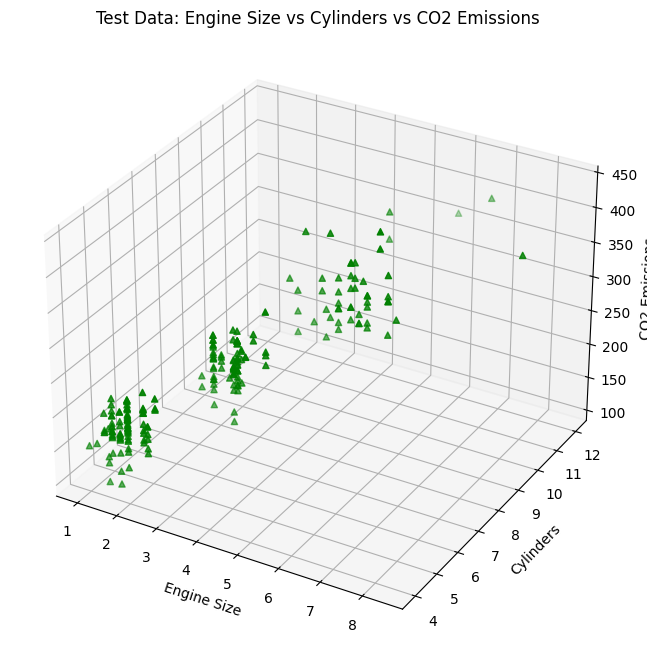

In [17]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the test data
ax.scatter(test['ENGINESIZE'], test['CYLINDERS'], test['CO2EMISSIONS'], c='green', marker='^')

# Labeling the axes
ax.set_xlabel('Engine Size')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 Emissions')

# Title
ax.set_title('Test Data: Engine Size vs Cylinders vs CO2 Emissions')

plt.show()

# **MULTIPLE LINEAR REGRESSION**

# Train The Model

In [18]:
# Prepare the training data with two independent variables
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS']])
train_y = np.asanyarray(train['CO2EMISSIONS'])  # Ensure train_y is a 1D array

# Prepare the test data with two independent variables
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS']])
test_y = np.asanyarray(test['CO2EMISSIONS'])  # Ensure test_y is a 1D array

# Create the LinearRegression object
regr = LinearRegression()

# Fit the model
regr.fit(train_x, train_y)

# Print the model parameters
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)

# Predict the CO2EMISSIONS using the test data
test_y_pred = regr.predict(test_x)

Coefficients:  [28.94394117  8.38047988]
Intercept:  111.37994337122183


# Visualization

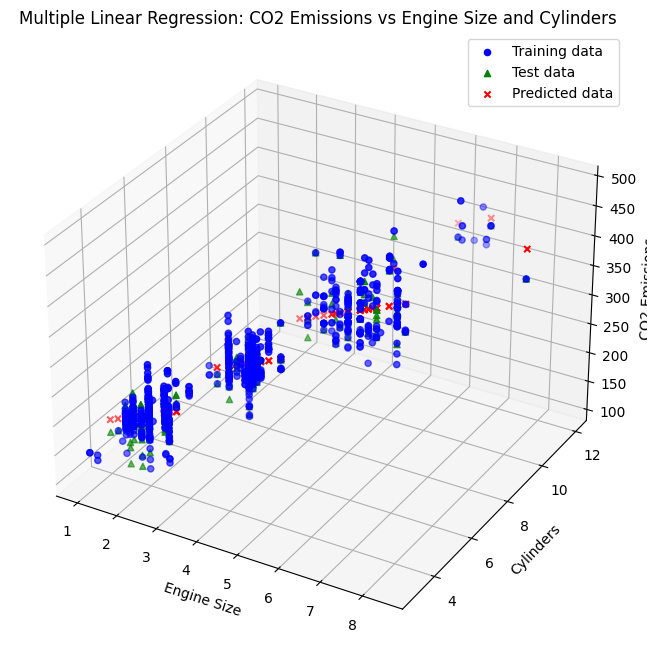

In [19]:
# Visualization
fig = plt.figure(figsize=(12, 8))  # Increase the figure size
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data points
ax.scatter(train['ENGINESIZE'], train['CYLINDERS'], train['CO2EMISSIONS'], color='blue', marker='o', label='Training data')
ax.scatter(test['ENGINESIZE'], test['CYLINDERS'], test['CO2EMISSIONS'], color='green', marker='^', label='Test data')
ax.scatter(test['ENGINESIZE'], test['CYLINDERS'], test_y_pred, color='red', marker='x', label='Predicted data')

# Set labels
ax.set_xlabel('Engine Size')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 Emissions')

# Set the title
ax.set_title('Multiple Linear Regression: CO2 Emissions vs Engine Size and Cylinders')

# Show the legend
ax.legend()

# Show the plot
plt.show()

# Model Performance

In [20]:
# Calculate accuracy metrics

# Calculate R² score
r2 = r2_score(test_y, test_y_pred)
print("R² (Coefficient of Determination): ", r2)

# Calculate Mean Absolute Error
mae = mean_absolute_error(test_y, test_y_pred)
print("Mean Absolute Error: ", mae)

R² (Coefficient of Determination):  0.7748904347438592
Mean Absolute Error:  23.754902758102915


# **K-NEAREST NEIGHBOURS**

# Train The Model

In [21]:
# Prepare the training data with two independent variables
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS']])
train_y = np.asanyarray(train['CO2EMISSIONS'])  # Ensure train_y is a 1D array

# Prepare the test data with two independent variables
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS']])
test_y = np.asanyarray(test['CO2EMISSIONS'])  # Ensure test_y is a 1D array

# Create the KNeighborsRegressor object
knn = neighbors.KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn.fit(train_x, train_y)

# Print the model parameters
print("Model Parameters: ", knn)

# Predict the CO2EMISSIONS using the test data
test_y_pred = knn.predict(test_x)

Model Parameters:  KNeighborsRegressor()


# Visualization

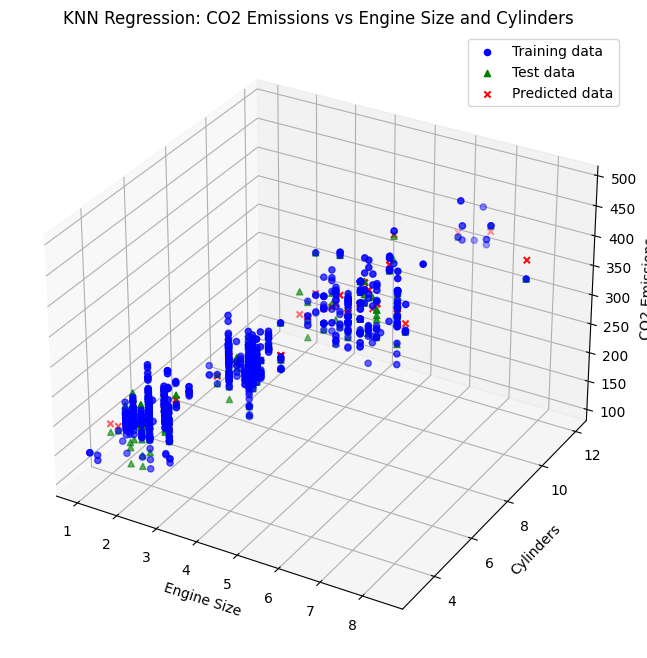

In [22]:
# Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data points
ax.scatter(train['ENGINESIZE'], train['CYLINDERS'], train['CO2EMISSIONS'], color='blue', marker='o', label='Training data')
ax.scatter(test['ENGINESIZE'], test['CYLINDERS'], test['CO2EMISSIONS'], color='green', marker='^', label='Test data')
ax.scatter(test['ENGINESIZE'], test['CYLINDERS'], test_y_pred, color='red', marker='x', label='Predicted data')

# Set labels
ax.set_xlabel('Engine Size')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 Emissions')

# Set the title
ax.set_title('KNN Regression: CO2 Emissions vs Engine Size and Cylinders')

# Show the legend
ax.legend()

# Show the plot
plt.show()

# Model Performance

In [23]:
# Calculate accuracy metrics
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R² score
r2 = r2_score(test_y, test_y_pred)
print("R² (Coefficient of Determination): ", r2)

# Calculate Mean Absolute Error
mae = mean_absolute_error(test_y, test_y_pred)
print("Mean Absolute Error: ", mae)

R² (Coefficient of Determination):  0.7985530070547108
Mean Absolute Error:  22.45233644859813


# **DECISION TREE**

# Train The Model

In [24]:
# Prepare the training data with two independent variables
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS']])
train_y = np.asanyarray(train['CO2EMISSIONS'])  # Ensure train_y is a 1D array

# Prepare the test data with two independent variables
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS']])
test_y = np.asanyarray(test['CO2EMISSIONS'])  # Ensure test_y is a 1D array

# Create the DecisionTreeRegressor object
dtr = DecisionTreeRegressor()

# Fit the model
dtr.fit(train_x, train_y)

# Print the model parameters
print("Model Parameters: ", dtr)

# Predict the CO2EMISSIONS using the test data
test_y_pred = dtr.predict(test_x)

Model Parameters:  DecisionTreeRegressor()


# Visualization

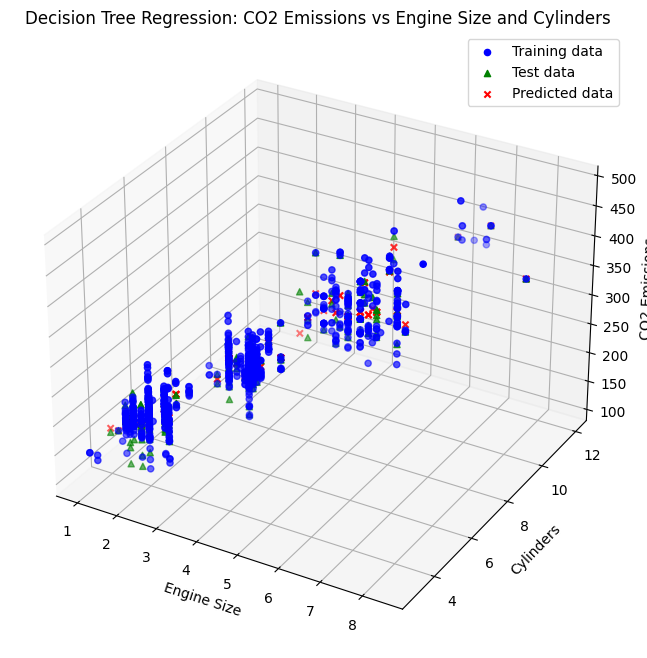

In [25]:
# Visualization
fig = plt.figure(figsize=(12, 8))  # Increase the figure size
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data points
ax.scatter(train['ENGINESIZE'], train['CYLINDERS'], train['CO2EMISSIONS'], color='blue', marker='o', label='Training data')
ax.scatter(test['ENGINESIZE'], test['CYLINDERS'], test['CO2EMISSIONS'], color='green', marker='^', label='Test data')
ax.scatter(test['ENGINESIZE'], test['CYLINDERS'], test_y_pred, color='red', marker='x', label='Predicted data')

# Set labels
ax.set_xlabel('Engine Size')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 Emissions')

# Set the title
ax.set_title('Decision Tree Regression: CO2 Emissions vs Engine Size and Cylinders')

# Show the legend
ax.legend()

# Show the plot
plt.show()

# Model Performance

In [26]:
# Calculate accuracy metrics

# Calculate R² score
r2 = r2_score(test_y, test_y_pred)
print("R² (Coefficient of Determination): ", r2)

# Calculate Mean Absolute Error
mae = mean_absolute_error(test_y, test_y_pred)
print("Mean Absolute Error: ", mae)

R² (Coefficient of Determination):  0.8301581162843555
Mean Absolute Error:  19.848511653743795


# **RANDOM FOREST**

# Train The Model

In [27]:
# Prepare the training data with two independent variables
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS']])
train_y = np.asanyarray(train['CO2EMISSIONS'])  # Ensure train_y is a 1D array

# Prepare the test data with two independent variables
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS']])
test_y = np.asanyarray(test['CO2EMISSIONS'])  # Ensure test_y is a 1D array

# Create the RandomForestRegressor object
regr = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
regr.fit(train_x, train_y)

# Print the model parameters
# Note: RandomForestRegressor does not have coefficients and intercept like linear regression
# print("Coefficients: ", regr.coef_)  # This will not work for RandomForest
# print("Intercept: ", regr.intercept_)  # This will not work for RandomForest

# Predict the CO2EMISSIONS using the test data
test_y_pred = regr.predict(test_x)

# Save The Model 

In [28]:
import joblib
# Save the model to a file
joblib.dump(regr, '/kaggle/working/random_forest_model.pkl')

['/kaggle/working/random_forest_model.pkl']

# Visualization

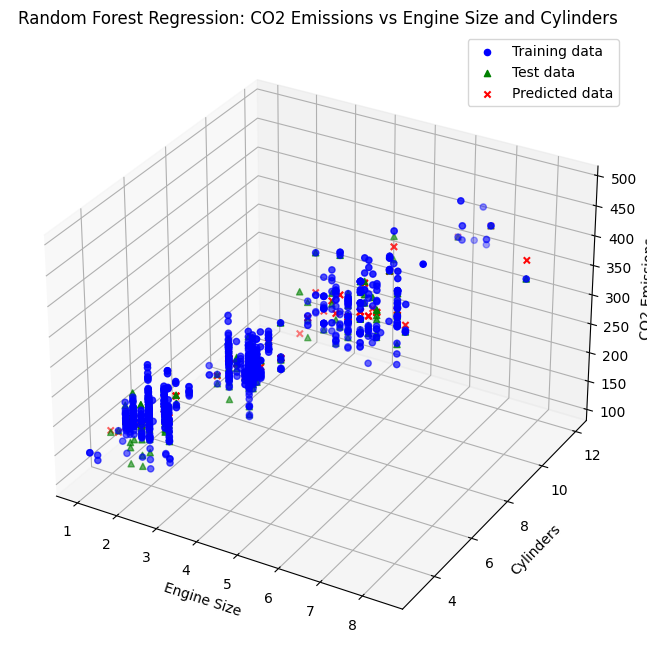

In [29]:
# Visualization
fig = plt.figure(figsize=(12, 8))  # Increase the figure size
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data points
ax.scatter(train['ENGINESIZE'], train['CYLINDERS'], train['CO2EMISSIONS'], color='blue', marker='o', label='Training data')
ax.scatter(test['ENGINESIZE'], test['CYLINDERS'], test['CO2EMISSIONS'], color='green', marker='^', label='Test data')
ax.scatter(test['ENGINESIZE'], test['CYLINDERS'], test_y_pred, color='red', marker='x', label='Predicted data')

# Set labels
ax.set_xlabel('Engine Size')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 Emissions')

# Set the title
ax.set_title('Random Forest Regression: CO2 Emissions vs Engine Size and Cylinders')

# Show the legend
ax.legend()

# Show the plot
plt.show()

# Model Performance

In [30]:
# Calculate accuracy metrics

# Calculate R² score
r2 = r2_score(test_y, test_y_pred)
print("R² (Coefficient of Determination): ", r2)

# Calculate Mean Absolute Error
mae = mean_absolute_error(test_y, test_y_pred)
print("Mean Absolute Error: ", mae)

R² (Coefficient of Determination):  0.8301648829209133
Mean Absolute Error:  19.924102648878534


# **SUPPORT VECTOR MACHINE**

# Train The Model

In [31]:
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS']])
train_y = np.asanyarray(train['CO2EMISSIONS'])  # Ensure train_y is a 1D array

# Prepare the test data with two independent variables
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS']])
test_y = np.asanyarray(test['CO2EMISSIONS'])  # Ensure test_y is a 1D array

# Create the SVR object
regr = SVR(kernel='rbf')

# Fit the model
regr.fit(train_x, train_y)

# Predict the CO2EMISSIONS using the test data
test_y_pred = regr.predict(test_x)

# Visualization

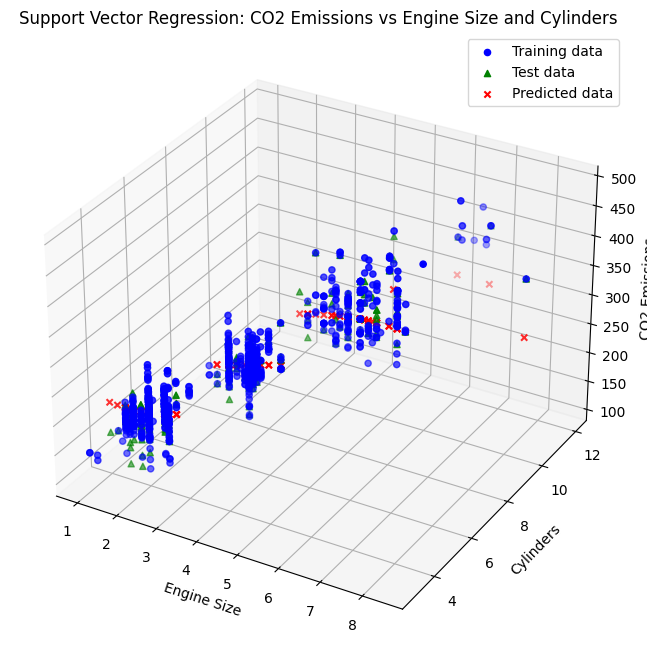

In [32]:
# Visualization
fig = plt.figure(figsize=(12, 8))  # Increase the figure size
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data points
ax.scatter(train['ENGINESIZE'], train['CYLINDERS'], train['CO2EMISSIONS'], color='blue', marker='o', label='Training data')
ax.scatter(test['ENGINESIZE'], test['CYLINDERS'], test['CO2EMISSIONS'], color='green', marker='^', label='Test data')
ax.scatter(test['ENGINESIZE'], test['CYLINDERS'], test_y_pred, color='red', marker='x', label='Predicted data')

# Set labels
ax.set_xlabel('Engine Size')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 Emissions')

# Set the title
ax.set_title('Support Vector Regression: CO2 Emissions vs Engine Size and Cylinders')

# Show the legend
ax.legend()

# Show the plot
plt.show()

# Model Performance

In [33]:
# Calculate accuracy metrics

# Calculate R² score
r2 = r2_score(test_y, test_y_pred)
print("R² (Coefficient of Determination): ", r2)

# Calculate Mean Absolute Error
mae = mean_absolute_error(test_y, test_y_pred)
print("Mean Absolute Error: ", mae)

R² (Coefficient of Determination):  0.7076410561043363
Mean Absolute Error:  26.39728799119751


# **PASSIVE AGGRESSIVE REGRESSOR**

# Train The Model

In [34]:
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS']])
train_y = np.asanyarray(train['CO2EMISSIONS'])  # Ensure train_y is a 1D array

# Prepare the test data with two independent variables
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS']])
test_y = np.asanyarray(test['CO2EMISSIONS'])  # Ensure test_y is a 1D array

# Create the PassiveAggressiveRegressor object
regr = PassiveAggressiveRegressor(max_iter=1000, random_state=42)

# Fit the model
regr.fit(train_x, train_y)

# Print the model parameters
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)

# Predict the CO2EMISSIONS using the test data
test_y_pred = regr.predict(test_x)

Coefficients:  [32.59146172  9.10685118]
Intercept:  [108.93249895]


# Visualization

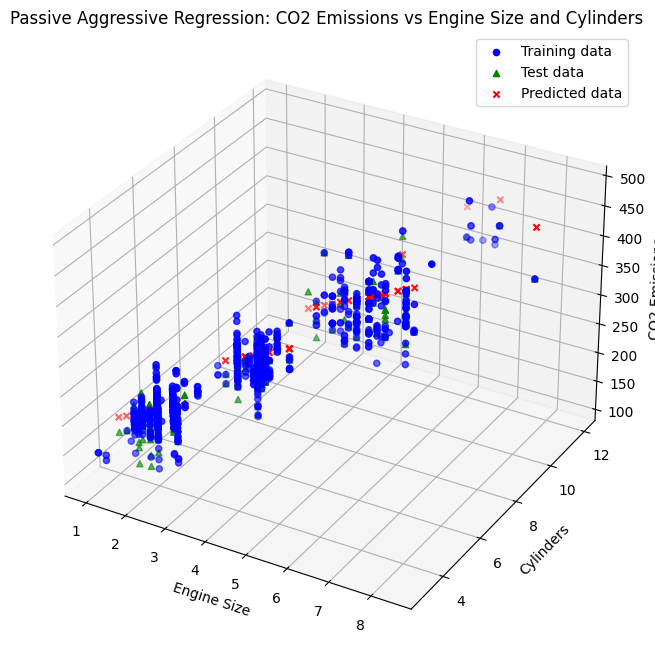

In [35]:
# Visualization
fig = plt.figure(figsize=(12, 8))  # Increase the figure size
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data points
ax.scatter(train['ENGINESIZE'], train['CYLINDERS'], train['CO2EMISSIONS'], color='blue', marker='o', label='Training data')
ax.scatter(test['ENGINESIZE'], test['CYLINDERS'], test['CO2EMISSIONS'], color='green', marker='^', label='Test data')
ax.scatter(test['ENGINESIZE'], test['CYLINDERS'], test_y_pred, color='red', marker='x', label='Predicted data')

# Set labels
ax.set_xlabel('Engine Size')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 Emissions')

# Set the title
ax.set_title('Passive Aggressive Regression: CO2 Emissions vs Engine Size and Cylinders')

# Show the legend
ax.legend()

# Show the plot
plt.show()

# Model Performance

In [36]:
# Calculate accuracy metrics

# Calculate R² score
r2 = r2_score(test_y, test_y_pred)
print("R² (Coefficient of Determination): ", r2)

# Calculate Mean Absolute Error
mae = mean_absolute_error(test_y, test_y_pred)
print("Mean Absolute Error: ", mae)

R² (Coefficient of Determination):  0.7060892178667947
Mean Absolute Error:  27.512471419326058


# **NEURAL NETWORKS**

# Train The Model

In [40]:
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS']])
train_y = np.asanyarray(train['CO2EMISSIONS']).reshape(-1, 1)  # Ensure train_y is a 2D array

# Prepare the test data with two independent variables
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS']])
test_y = np.asanyarray(test['CO2EMISSIONS']).reshape(-1, 1)  # Ensure test_y is a 2D array

# Normalize the data
scaler_x = StandardScaler()
scaler_y = StandardScaler()

train_x = scaler_x.fit_transform(train_x)
train_y = scaler_y.fit_transform(train_y)

test_x = scaler_x.transform(test_x)
test_y = scaler_y.transform(test_y)

# Create the neural network model
model = Sequential()
model.add(Input(shape=(2,)))  # Specify the input shape in the Input layer
model.add(Dense(64, activation='relu'))  # First hidden layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Second hidden layer with 32 neurons
model.add(Dense(1))  # Output layer with 1 neuron

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(train_x, train_y, epochs=100, batch_size=10, verbose=1)

# Predict the CO2EMISSIONS using the test data
test_y_pred = model.predict(test_x)
test_y_pred = scaler_y.inverse_transform(test_y_pred)  # Inverse transform the predictions to original scale
test_y = scaler_y.inverse_transform(test_y)  # Inverse transform the test_y to original scale

Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7703
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2466
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2307
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2296
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2137
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2348
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2293
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2401
Epoch 9/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2128
Epoch 10/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2516
Epoch 11/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2311
Epoch 12/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2155
Epoch 13/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2281
Epoch 14/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2223
Epoch 15/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2227
Epoc

# Visualization

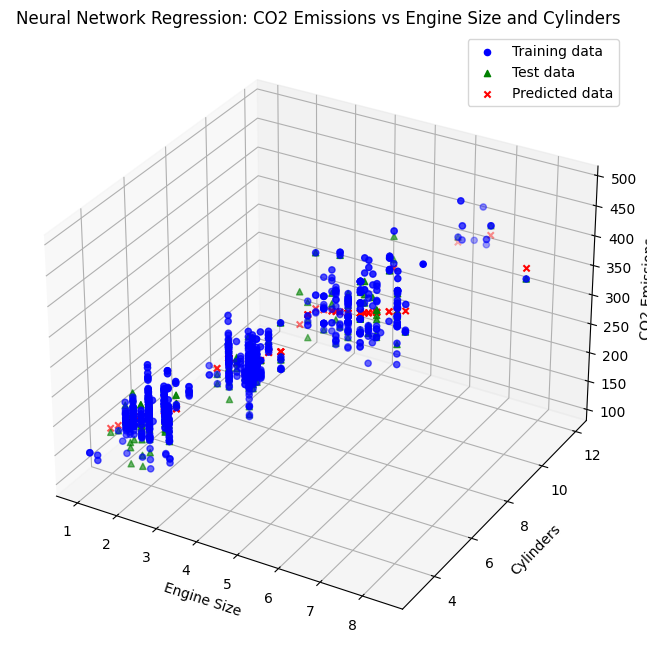

In [38]:
# Visualization
fig = plt.figure(figsize=(12, 8))  # Increase the figure size
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data points
ax.scatter(train['ENGINESIZE'], train['CYLINDERS'], train['CO2EMISSIONS'], color='blue', marker='o', label='Training data')
ax.scatter(test['ENGINESIZE'], test['CYLINDERS'], test['CO2EMISSIONS'], color='green', marker='^', label='Test data')
ax.scatter(test['ENGINESIZE'], test['CYLINDERS'], test_y_pred, color='red', marker='x', label='Predicted data')

# Set labels
ax.set_xlabel('Engine Size')
ax.set_ylabel('Cylinders')
ax.set_zlabel('CO2 Emissions')

# Set the title
ax.set_title('Neural Network Regression: CO2 Emissions vs Engine Size and Cylinders')

# Show the legend
ax.legend()

# Show the plot
plt.show()

# Model Performance

In [39]:
# Calculate accuracy metrics

# Calculate R² score
r2 = r2_score(test_y, test_y_pred)
print("R² (Coefficient of Determination): ", r2)

# Calculate Mean Absolute Error
mae = mean_absolute_error(test_y, test_y_pred)
print("Mean Absolute Error: ", mae)

R² (Coefficient of Determination):  0.7873850508599045
Mean Absolute Error:  22.497414990006206
